In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#get movies data

movies = pd.read_csv(r'C:\Users\Iremide\Desktop\titles.csv')
#df2 = pd.read_csv(r'C:\Users\Iremide\Desktop\credits.csv')

In [3]:
movies.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [4]:
#collect particular columns

movies =  movies[['title', 'type', 'release_year', 'age_certification', 'runtime', 'genres', 'seasons', 'imdb_score', 'tmdb_score', 'tmdb_popularity']]
movies.head()

,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,tmdb_score,tmdb_popularity
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],1.0,NaN,NaN,0.600
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",NaN,8.3,8.2,27.612
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",NaN,8.2,7.8,18.216
3,Life of Brian,MOVIE,1979,R,94,['comedy'],NaN,8.0,7.8,17.505
4,The Exorcist,MOVIE,1973,R,133,['horror'],NaN,8.1,7.7,95.337


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5805 non-null   object 
 1   type               5806 non-null   object 
 2   release_year       5806 non-null   int64  
 3   age_certification  3196 non-null   object 
 4   runtime            5806 non-null   int64  
 5   genres             5806 non-null   object 
 6   seasons            2047 non-null   float64
 7   imdb_score         5283 non-null   float64
 8   tmdb_score         5488 non-null   float64
 9   tmdb_popularity    5712 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 453.7+ KB


In [6]:
print(movies.isnull().sum())

title                   1
type                    0
release_year            0
age_certification    2610
runtime                 0
genres                  0
seasons              3759
imdb_score            523
tmdb_score            318
tmdb_popularity        94
dtype: int64


In [7]:
#drop the one nan in title column

movies.dropna(subset = ['title'] , inplace= True)

In [8]:
#data cleaning

movies['seasons'].fillna(0, inplace= True)
movies['age_certification'].fillna('TV_PG', inplace = True)
movies.fillna(method= "bfill", inplace = True)
movies['tmdb_score'].fillna(movies['tmdb_score'].mean(), inplace= True)
movies.isnull().sum()

title                0
type                 0
release_year         0
age_certification    0
runtime              0
genres               0
seasons              0
imdb_score           0
tmdb_score           0
tmdb_popularity      0
dtype: int64

In [9]:
#column genre preprocessing

movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')
movies.head(2)

,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,tmdb_score,tmdb_popularity
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,[documentation],1.0,8.3,8.2,0.600
1,Taxi Driver,MOVIE,1976,R,113,"[crime, drama]",0.0,8.3,8.2,27.612


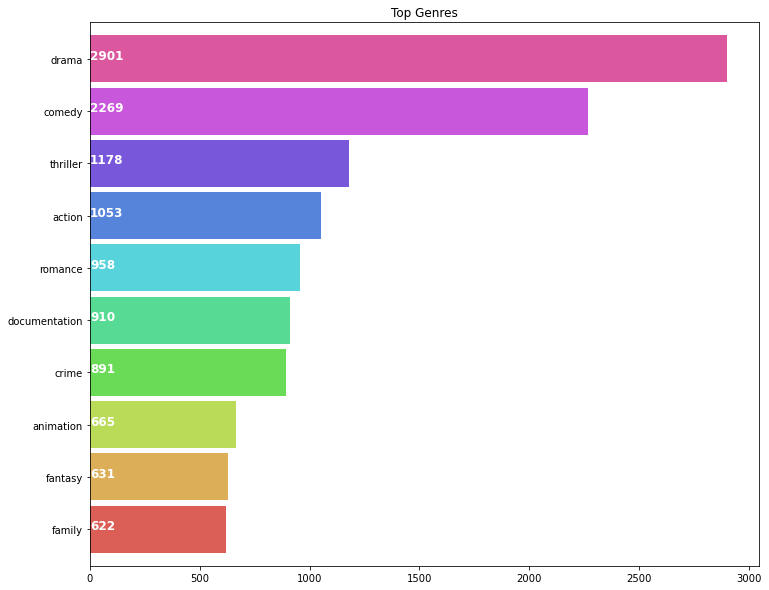

In [10]:
#data visualization for column genres

plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()


In [11]:
movies = movies.copy()
movies.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'seasons', 'imdb_score', 'tmdb_score', 'tmdb_popularity'],
      dtype='object')

In [12]:
#Data preprocessing by scaling the numerical columns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_names = ['release_year', 'runtime',  'seasons', 'imdb_score', 'tmdb_score', 'tmdb_popularity']
features = movies[col_names]
#scaler = StandardScaler()
scaler= MinMaxScaler()
# transform data
features = scaler.fit_transform(features.values)

In [13]:
#fit back the scaled values to the datafram

movies[col_names] = features
movies.tail()

,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,tmdb_score,tmdb_popularity
5801,Fine Wine,MOVIE,0.987013,TV_PG,0.398406,"[romance, drama]",0.00000,0.666667,0.842105,0.000525
5802,Edis Starlight,MOVIE,0.987013,TV_PG,0.294821,"[music, documentation]",0.00000,0.617284,0.842105,0.000563
5803,Clash,MOVIE,0.987013,TV_PG,0.350598,"[family, drama]",0.00000,0.617284,1.000000,0.000384
5804,Shadow Parties,MOVIE,0.987013,TV_PG,0.462151,"[action, thriller]",0.00000,0.580247,1.000000,0.001194
5805,Mighty Little Bheem: Kite Festival,SHOW,0.987013,TV_PG,0.000000,"[family, comedy, animation]",0.02381,0.901235,1.000000,0.000532


In [14]:
#transform stirng column

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer( stop_words='english' )

In [15]:
#transform to matrix variable

#matrix1 = tf.fit_transform(movies['type']).todense()
matrix2 = tf.fit_transform(movies['age_certification']).todense()

In [16]:
print(tf.get_feature_names())

['13', '14', '17', 'ma', 'nc', 'pg', 'tv', 'tv_pg', 'y7']


In [17]:
#shape of transformed string column

matrix2.shape

(5805, 9)

In [18]:
#measure similarity btwn vector list

from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
cosine_similarities = cosine_similarity(matrix2, matrix2)

In [19]:
#get movies title to a series

movie_title = movies['title']
indices = pd.Series(movies.index, index= movies['title']).drop_duplicates()
indices.head()

title
Five Came Back: The Reference Films    0
Taxi Driver                            1
Monty Python and the Holy Grail        2
Life of Brian                          3
The Exorcist                           4
dtype: int64

In [20]:
#create function that recommend movies

def movie_recommend(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return movie_title.iloc[movie_indices]
    #print(sim_scores)


In [21]:
movie_recommend('Extinction').head(10)

56               Awakenings
108            Forrest Gump
109           Happy Gilmore
115                 Gattaca
124           U.S. Marshals
127        Last Action Hero
128    Seven Years in Tibet
138       The Mask of Zorro
145        The Replacements
148                Anaconda
Name: title, dtype: object

In [22]:
movie_recommend('Life of Brian').head(10)

1                         Taxi Driver
2     Monty Python and the Holy Grail
3                       Life of Brian
4                        The Exorcist
5        Monty Python's Flying Circus
6                         Dirty Harry
7                        My Fair Lady
8                     The Blue Lagoon
9                    Bonnie and Clyde
10                  The Professionals
Name: title, dtype: object

In [23]:
movie_recommend('The Exorcist').head(10)

1                         Taxi Driver
2     Monty Python and the Holy Grail
3                       Life of Brian
4                        The Exorcist
5        Monty Python's Flying Circus
6                         Dirty Harry
7                        My Fair Lady
8                     The Blue Lagoon
9                    Bonnie and Clyde
10                  The Professionals
Name: title, dtype: object